In [23]:
import pandas as pd
from fuzzywuzzy import fuzz
import swifter
import matplotlib.pyplot as plt
import os

In [3]:
train_df = pd.read_csv('../data/train.csv.zip').dropna()
test_df = pd.read_csv('../data/test.csv.zip').dropna()
train_df.head()

/home/omid-dev/Personal/venvs/data_science_challenges/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
train_df['simple_ratio'] = train_df.swifter.apply(lambda x: fuzz.ratio(x['question1'], x['question2']), axis=1)
train_df['partial_ratio'] = train_df.swifter.apply(lambda x: fuzz.partial_ratio(x['question1'], x['question2']), axis=1)
train_df['token_sort_ratio'] = train_df.swifter.apply(lambda x: fuzz.token_sort_ratio(x['question1'], x['question2']), axis=1)
train_df['token_set_ratio'] = train_df.swifter.apply(lambda x: fuzz.token_set_ratio(x['question1'], x['question2']), axis=1)
train_df.head()

Dask Apply: 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]


,id,qid1,qid2,question1,question2,is_duplicate,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,93,98,93,100
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,65,73,63,86
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,45,41,63,63
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,7,20,24,28
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,37,54,47,67


In [12]:
# find the best threshold to use by trying all thresholds and getting their accuracies

def is_correct(row, ratio_type, threshold):
    is_duplicate = True if row['is_duplicate'] == 1 else False
    return is_duplicate == (row[ratio_type] >= threshold)

thres_accuracy_map = {}

for threshold in range(0, 100, 5):
    simple_ratio_col = f'simple_ratio_correct_{threshold}'
    partial_ratio_col = f'partial_ratio_correct_{threshold}'
    token_sort_ratio_col = f'token_sort_ratio_correct_{threshold}'
    token_set_ratio_col = f'token_set_ratio_correct_{threshold}'

    train_df[simple_ratio_col] = train_df.swifter.apply(lambda x: is_correct(x, 'simple_ratio', threshold), axis=1)
    train_df[partial_ratio_col] = train_df.swifter.apply(lambda x: is_correct(x, 'partial_ratio', threshold), axis=1)
    train_df[token_sort_ratio_col] = train_df.swifter.apply(lambda x: is_correct(x, 'token_sort_ratio', threshold), axis=1)
    train_df[token_set_ratio_col] = train_df.swifter.apply(lambda x: is_correct(x, 'token_set_ratio', threshold), axis=1)

    simple_ratio_accuracy = len(train_df[simple_ratio_col].loc[train_df[simple_ratio_col] == True])/len(train_df[simple_ratio_col])
    partial_ratio_accuracy = len(train_df[partial_ratio_col].loc[train_df[partial_ratio_col] == True])/len(train_df[partial_ratio_col])
    token_sort_ratio_accuracy = len(train_df[token_sort_ratio_col].loc[train_df[token_sort_ratio_col] == True])/len(train_df[token_sort_ratio_col])
    token_set_ratio_accuracy = len(train_df[token_set_ratio_col].loc[train_df[token_set_ratio_col] == True])/len(train_df[token_set_ratio_col])

    thres_accuracy_map[threshold] = {
        'simple_ratio_accuracy': simple_ratio_accuracy,
        'partial_ratio_accuracy': partial_ratio_accuracy,
        'token_sort_ratio_accuracy': token_sort_ratio_accuracy,
        'token_set_ratio_accuracy': token_set_ratio_accuracy,
    }

Dask Apply: 100%|██████████| 32/32 [00:01<00:00, 19.59it/s]


In [14]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,simple_ratio,partial_ratio,token_sort_ratio,token_set_ratio,...,token_sort_ratio_correct_85,token_set_ratio_correct_85,simple_ratio_correct_90,partial_ratio_correct_90,token_sort_ratio_correct_90,token_set_ratio_correct_90,simple_ratio_correct_95,partial_ratio_correct_95,token_sort_ratio_correct_95,token_set_ratio_correct_95
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,93,98,93,100,...,False,False,False,False,False,False,True,False,True,False
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,65,73,63,86,...,True,False,True,True,True,True,True,True,True,True
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,45,41,63,63,...,True,True,True,True,True,True,True,True,True,True
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,7,20,24,28,...,True,True,True,True,True,True,True,True,True,True
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,37,54,47,67,...,True,True,True,True,True,True,True,True,True,True


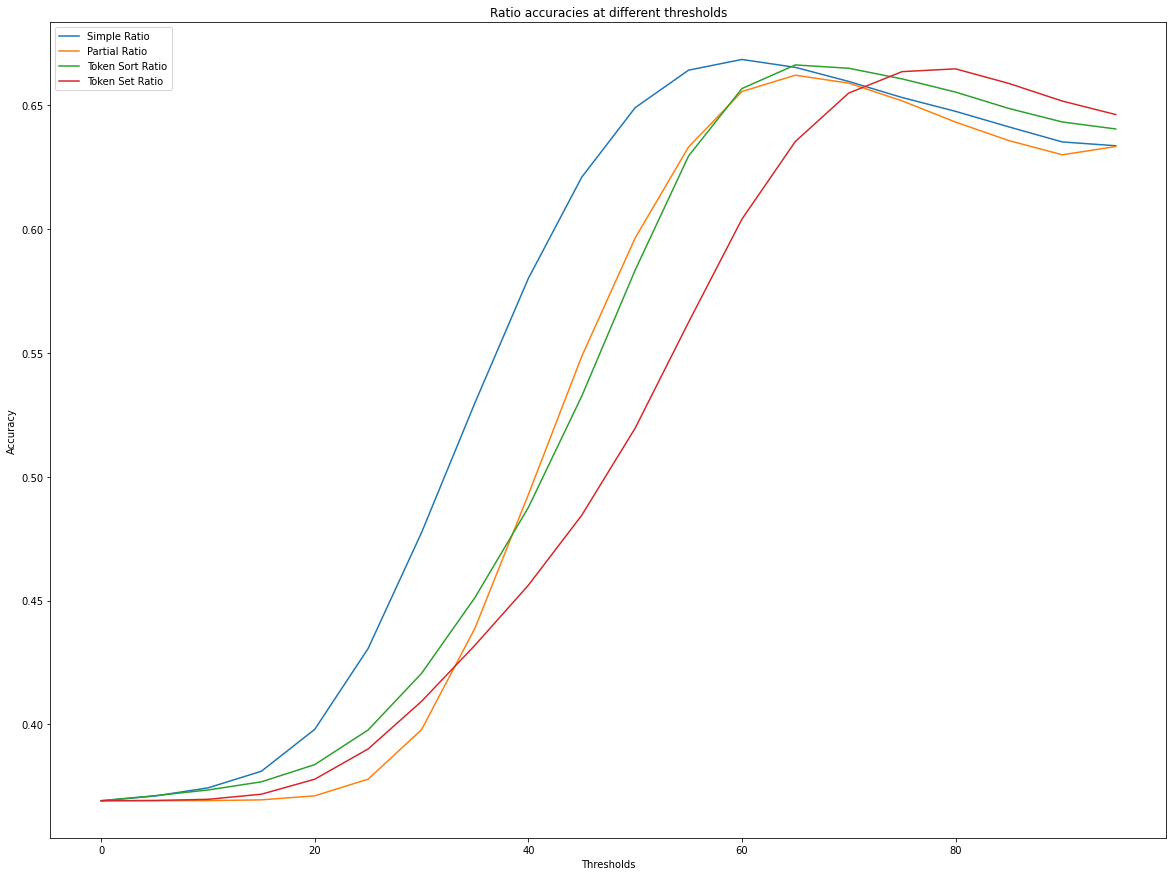

In [13]:
plt.figure(num=4, figsize=(20,15))

plt.plot(thres_accuracy_map.keys(), [ratio_accuracies['simple_ratio_accuracy'] for ratio_accuracies in thres_accuracy_map.values()], label='Simple Ratio')
plt.plot(thres_accuracy_map.keys(), [ratio_accuracies['partial_ratio_accuracy'] for ratio_accuracies in thres_accuracy_map.values()], label='Partial Ratio')
plt.plot(thres_accuracy_map.keys(), [ratio_accuracies['token_sort_ratio_accuracy'] for ratio_accuracies in thres_accuracy_map.values()], label='Token Sort Ratio')
plt.plot(thres_accuracy_map.keys(), [ratio_accuracies['token_set_ratio_accuracy'] for ratio_accuracies in thres_accuracy_map.values()], label='Token Set Ratio')

plt.xlabel("Thresholds")
plt.ylabel("Accuracy")
plt.title("Ratio accuracies at different thresholds")
plt.legend(loc="upper left")

In [29]:
# simple ratio at a threshold of 55 looks like it has the highest accuracy
# store false negatives and explore the data using exploratory_data_analysis notebook
false_negatives = train_df.loc[train_df['simple_ratio_correct_55'] == False]
false_negatives.to_csv('../output/simple_ratio_correct_55_false_negatives.csv')
false_negatives.count()


id                             135751
qid1                           135751
qid2                           135751
question1                      135751
question2                      135751
                                ...  
token_set_ratio_correct_90     135751
simple_ratio_correct_95        135751
partial_ratio_correct_95       135751
token_sort_ratio_correct_95    135751
token_set_ratio_correct_95     135751
Length: 94, dtype: int64